In [1]:
from phasespace import GenParticle

import tensorflow as tf
import tensorflow_probability as tfp

import numpy as np

In [ ]:
mass_dict = { # in MeV
            "Y" : 10580,
            "B0" : 5280,
            "B" : 5280,
            "D" : 1870,
            "D0" : 1865,
            "rho" : 770
        }
width_dict = { # in MeV
            "Y" : 50,
            "B0" : 60,
            "B" : 30,
            "D" : 10,
            "D0" : 15,
            "rho" : 150
        }

In [52]:
def func_attribute(message):
    
    print(message + func_attribute.x)
 

func_attribute.x = " extra"
func_attribute("here")

here extra


In [66]:
def mass_distribution(min_mass, max_mass, n_events):
    
    min_mass = tf.cast(min_mass, tf.float64)
    max_mass = tf.cast(max_mass, tf.float64)
    
    width_cast = tf.cast(mass_distribution.width, tf.float64)
    mass_cast = tf.cast(mass_distribution.mass, dtype=tf.float64)

    particle_mass = tf.broadcast_to(mass_cast, shape=(n_events,))
    if width_cast > 0:
        particle_mass = tfp.distributions.TruncatedCauchy(loc=mass_cast,
                                                        scale=width_cast,
                                                        low=min_mass,
                                                        high=max_mass).sample()
        
    return particle_mass

In [67]:
from phasespace import GenParticle

mass_distribution.width = 0.0
mass_distribution.mass = 2200

bz = GenParticle('B0', 5280)

Ks0 = GenParticle('K*0', mass=mass_distribution)
Kp = GenParticle('K+', mass=494)
pim = GenParticle('pi-', mass=140)
gamma = GenParticle('gamma', mass=0.0)

Ks0.set_children(pim,gamma)
bz.set_children(Ks0,Kp)

weights, particles = bz.generate(n_events=10000)

OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed: AutoGraph is disabled in this function. Try decorating it directly with @tf.function.

min: 2199.9999999999995
max: 2200.000000000001


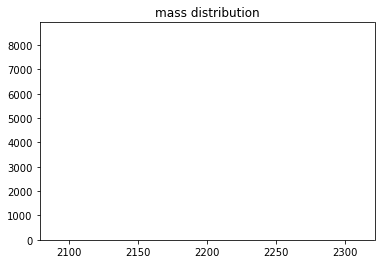

In [68]:
par = particles['K*0']
par = np.array(par)
masses_squared = (par[:,3]**2 - (par[:,0:3]**2).sum(axis=1))  # m^2 = (E^2 - p^2)
masses = np.sqrt(masses_squared)
masses

import matplotlib.pyplot as plt

print("min:",min(masses))
print("max:",max(masses))


_ = plt.hist(masses, bins=100)  # arguments are passed to np.histogram
plt.title("mass distribution")


plt.show()

In [69]:
masses

array([2200., 2200., 2200., ..., 2200., 2200., 2200.])

In [65]:
mass = 0
width = 0
limit = 5

distribution = mass_distribution(mass, width, 10000)

In [20]:
mass = 775
width = 150
limit = 5

distribution = mass_distribution(mass, width, 10000)

In [21]:
distribution.shape

TensorShape([10000])

In [22]:
distribution = np.array(distribution)
distribution = np.absolute(distribution)


In [23]:
distribution[:10]

array([ 720.89915774,  782.42909792, 1008.88204094,  628.2490607 ,
        733.25361194,  889.65357309,  622.62411376,  925.24565818,
        668.44671365,  610.27876364])

In [24]:
len(distribution[distribution > (mass + limit*width)])/len(distribution)

0.0

In [25]:
len(distribution[distribution > (mass + limit*width)])

0

In [26]:
distribution[distribution > (mass + limit*width)] = mass_distribution(mass, width*0.1, len(distribution[distribution > (mass + limit*width)]))
distribution[distribution < (mass - limit*width)] = mass_distribution(mass, width*0.1, len(distribution[distribution < (mass - limit*width)]))


distribution[distribution > (mass + limit*width)] = mass
distribution[distribution < (mass - limit*width)] = mass

min: 261.6984292811985
max: 1342.31007961791


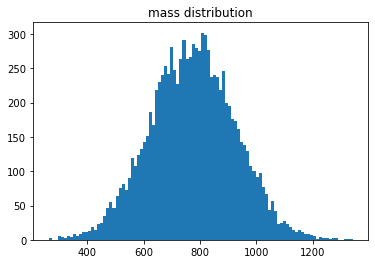

In [27]:
import matplotlib.pyplot as plt

print("min:",min(distribution))
print("max:",max(distribution))


_ = plt.hist(distribution, bins=100)  # arguments are passed to np.histogram
plt.title("mass distribution")


plt.show()

#  Hadron IDs:

In [21]:
import numpy as np 
import matplotlib.pyplot as plt


exp_scale = 0.05

kaon_idx = [0,1,4]

kaon_ID = np.random.exponential(scale=exp_scale, size=[100000,5,1])
kaon_ID[kaon_ID > 1.0] = 1.0  # ID has upper limit of one
kaon_ID[:,kaon_idx] = 1 - kaon_ID[:,kaon_idx] # invert the distribution for the kaons, to make the ID meaningful

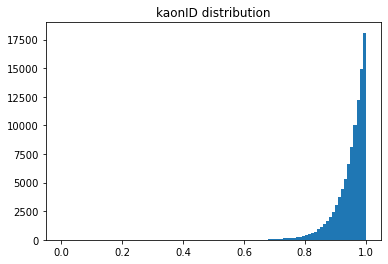

In [26]:
_ = plt.hist(kaon_ID[:,0], bins=100, range=(0.0, 1.0))  # arguments are passed to np.histogram
plt.title("kaonID distribution")
plt.show()

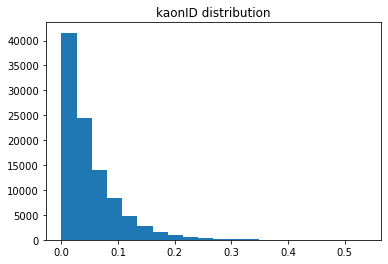

In [23]:
_ = plt.hist(kaon_ID[:,3], bins=20)  # arguments are passed to np.histogram
plt.title("kaonID distribution")
plt.show()

In [24]:
print(min(kaon_ID[:,3]))
print(max(kaon_ID[:,3]))

[5.40791412e-07]
[0.53705882]
